<a href="https://colab.research.google.com/github/nou321/PFE_Nour/blob/main/Cnn_Test_aug_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1- importer les bibliothéques

In [4]:
import os
from PIL import Image
import numpy as np 
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, recall_score, precision_score

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from keras.backend import dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

## 2- fixer les path des données augmenter (zoom, rotation,translation,flipped)


In [1]:

from google.colab import drive
drive.mount('/content/drive')
nsj_zoom='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/nsj_aug/nsj_zoom'
nsj_flipped='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/nsj_aug/nsj_fliped'
nsj_rotation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/nsj_aug/nsj_rotation'
nsj_noise='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/nsj_aug/nsj_noise'
nsj_translation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/nsj_aug/nsj_translation'
sj_zoom='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/sj_aug/sj_zoom'
sj_flipped='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/sj_aug/sj_fliped'
sj_rotation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/sj_aug/sj_rotation'
sj_noise='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/sj_aug/sj_noise'
sj_translation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/sj_aug/sj_translation'
sj_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/sj_aug'


Mounted at /content/drive


## Mise en Forme des images

In [2]:
def mise_tenseur (path, nl, nc,pl):
    images_liste = os.listdir(path)
    images_liste.sort()
    print(images_liste)
    Nb_images = len(images_liste)
    tenseur = np.empty((Nb_images, nl, nc, pl), dtype=np.uint8)
    k = 0
    for im in images_liste:
       
        img = imread(path+'/'+im)
        tenseur[k, :, :, 0] = img
        k +=1
    return(tenseur)

In [5]:
flipped_data= mise_tenseur(sj_flipped, 64, 64,1)
zoom_data=mise_tenseur(sj_zoom,64,64,1)
rotate_data=mise_tenseur(sj_rotation,64,64,1)
translate_data=mise_tenseur(sj_translation,64,64,1)
sj_data = []
sj_data.extend(flipped_data)
sj_data.extend(zoom_data)
sj_data.extend(rotate_data)
sj_data.extend(translate_data)
len(sj_data)

['001_Hfliped.jpg', '001_Vfliped.jpg', '002_Hfliped.jpg', '002_Vfliped.jpg', '003_Hfliped.jpg', '003_Vfliped.jpg', '009_Hfliped.jpg', '009_Vfliped.jpg', '011_Hfliped.jpg', '011_Vfliped.jpg', '013_Hfliped.jpg', '013_Vfliped.jpg', '015_Hfliped.jpg', '015_Vfliped.jpg', '019_Hfliped.jpg', '019_Vfliped.jpg', '020_Hfliped.jpg', '020_Vfliped.jpg', '022_Hfliped.jpg', '022_Vfliped.jpg', '023_Hfliped.jpg', '023_Vfliped.jpg', '025_Hfliped.jpg', '025_Vfliped.jpg', '027_Hfliped.jpg', '027_Vfliped.jpg', '028_Hfliped.jpg', '028_Vfliped.jpg', '030_Hfliped.jpg', '030_Vfliped.jpg', '031_Hfliped.jpg', '031_Vfliped.jpg', '032_Hfliped.jpg', '032_Vfliped.jpg', '035_Hfliped.jpg', '035_Vfliped.jpg', '036_Hfliped.jpg', '036_Vfliped.jpg', '037_Hfliped.jpg', '037_Vfliped.jpg', '044_Hfliped.jpg', '044_Vfliped.jpg', '045_Hfliped.jpg', '045_Vfliped.jpg', '046_Hfliped.jpg', '046_Vfliped.jpg', '047_Hfliped.jpg', '047_Vfliped.jpg', '048_Hfliped.jpg', '048_Vfliped.jpg', '049_Hfliped.jpg', '049_Vfliped.jpg', '050_Hflipe

3220

In [7]:
flipped_data_nsj= mise_tenseur(nsj_flipped, 64, 64,1)
zoom_data_nsj=mise_tenseur(nsj_zoom,64,64,1)
rotate_data_nsj=mise_tenseur(nsj_rotation,64,64,1)
translate_data_nsj=mise_tenseur(nsj_translation,64,64,1)
nsj_data = []
nsj_data.extend(flipped_data_nsj)
nsj_data.extend(zoom_data_nsj)
nsj_data.extend(rotate_data_nsj)
nsj_data.extend(translate_data_nsj)
len(nsj_data)


['004_Hfliped.jpg', '004_Vfliped.jpg', '005_Hfliped.jpg', '005_Vfliped.jpg', '006_Hfliped.jpg', '006_Vfliped.jpg', '007_Hfliped.jpg', '007_Vfliped.jpg', '008_Hfliped.jpg', '008_Vfliped.jpg', '010_Hfliped.jpg', '010_Vfliped.jpg', '012_Hfliped.jpg', '012_Vfliped.jpg', '014_Hfliped.jpg', '014_Vfliped.jpg', '016_Hfliped.jpg', '016_Vfliped.jpg', '017_Hfliped.jpg', '017_Vfliped.jpg', '018_Hfliped.jpg', '018_Vfliped.jpg', '021_Hfliped.jpg', '021_Vfliped.jpg', '024_Hfliped.jpg', '024_Vfliped.jpg', '026_Hfliped.jpg', '026_Vfliped.jpg', '029_Hfliped.jpg', '029_Vfliped.jpg', '033_Hfliped.jpg', '033_Vfliped.jpg', '034_Hfliped.jpg', '034_Vfliped.jpg', '038_Hfliped.jpg', '038_Vfliped.jpg', '039_Hfliped.jpg', '039_Vfliped.jpg', '040_Hfliped.jpg', '040_Vfliped.jpg', '041_Hfliped.jpg', '041_Vfliped.jpg', '042_Hfliped.jpg', '042_Vfliped.jpg', '043_Hfliped.jpg', '043_Vfliped.jpg', '051_Hfliped.jpg', '051_Vfliped.jpg', '057_Hfliped.jpg', '057_Vfliped.jpg', '058_Hfliped.jpg', '058_Vfliped.jpg', '062_Hflipe

3080

In [8]:
labels1 = [0] * len(nsj_data)  # labels pour la première classe (0)
labels2 = [1] * len(sj_data)  # labels pour la deuxième classe (1)

# Fusionner les données et les labels en un seul tableau multidimensionnel
data = np.concatenate([nsj_data, sj_data])
print(len(data))
labels = np.concatenate([labels1, labels2])
len(labels)


6300


6300

In [9]:
dataset = tf.data.Dataset.from_tensor_slices((data, labels))

In [19]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
# normaliser les données 
x_train = x_train.reshape(x_train.shape[0], 64,64, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 64,64, 1).astype('float32') / 255

In [20]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape = (64,64,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, kernel_size = (3,3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, kernel_size = (3,3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(8,(3,3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 16)        4624      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 16)        

In [21]:
model.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy
              ,metrics=[keras.metrics.Recall()])

In [22]:
#affichage de fnct loss +accuracy
H1 = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=200, batch_size=32)

Epoch 1/200
158/158 [==============================] - 5s 10ms/step - loss: 0.6772 - recall_2: 0.6565 - val_loss: 0.6476 - val_recall_2: 0.6865
Epoch 2/200
158/158 [==============================] - 1s 7ms/step - loss: 0.6366 - recall_2: 0.6789 - val_loss: 0.6613 - val_recall_2: 0.4875
Epoch 3/200
158/158 [==============================] - 1s 7ms/step - loss: 0.5779 - recall_2: 0.7568 - val_loss: 0.5251 - val_recall_2: 0.7210
Epoch 4/200
158/158 [==============================] - 1s 7ms/step - loss: 0.4803 - recall_2: 0.7750 - val_loss: 0.5759 - val_recall_2: 0.9436
Epoch 5/200
158/158 [==============================] - 1s 7ms/step - loss: 0.4214 - recall_2: 0.8060 - val_loss: 0.4025 - val_recall_2: 0.7633
Epoch 6/200
158/158 [==============================] - 1s 7ms/step - loss: 0.3732 - recall_2: 0.8122 - val_loss: 0.3823 - val_recall_2: 0.8448
Epoch 7/200
158/158 [==============================] - 1s 7ms/step - loss: 0.3352 - recall_2: 0.8338 - val_loss: 0.3383 - val_recall_2: 0.832

dict_keys(['loss', 'recall_2', 'val_loss', 'val_recall_2'])


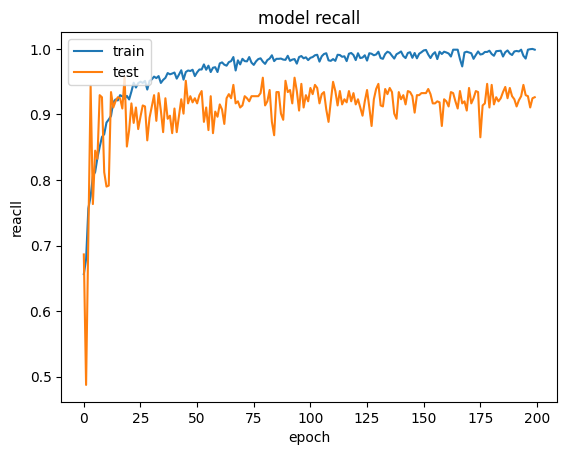

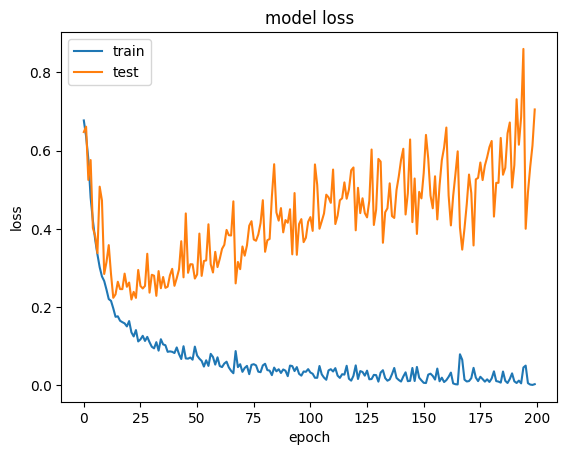

In [23]:
print(H1.history.keys())
# accuracy
plt.plot(H1.history['recall_2'])
plt.plot(H1.history['val_recall_2'])
plt.title('model recall')
plt.ylabel('reacll')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#recall 

#loss
plt.plot(H1.history['loss'])
plt.plot(H1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()